In [64]:
import os
import pathlib
import pandas as pd
import seaborn as sns

In [65]:
current_dir = pathlib.Path('').parent.resolve()
data_dir = current_dir / "data"
data = pd.read_csv(data_dir / 'new_hiv_infections.csv', names=[
    "region", "year", "num new infections", "new infections per 1000"])
data = data[2:]
data = data.dropna()
data.iloc[:,1] = data.iloc[:,1].astype('int32')
data = data.set_index(["region", "year"])
data.iloc[:,1] = data.iloc[:,1].apply(lambda x: x.split("[")[0]).str.extract('(\d+.?\d*)', expand=False).astype('float')
data = data.iloc[:,[1]]
data

new infections per 1000
region          year                         
Global          2020                     0.19
                2019                     0.20
                2018                     0.21
                2017                     0.23
                2016                     0.24
...                                       ...
Western Pacific 1994                     0.08
                1993                     0.03
                1992                     0.02
                1991                     0.02
                1990                     0.01

[217 rows x 1 columns]

<AxesSubplot:xlabel='year', ylabel='new infections per 1000'>

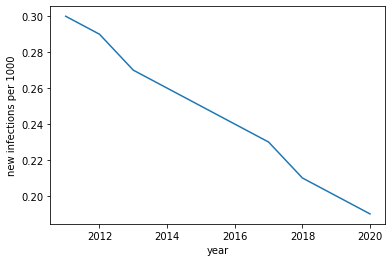

In [74]:
idx = data.index.to_frame()
data_past_10_years = data[(idx.year > 2010) & (idx.region == "Global")]
sns.lineplot(data=data_past_10_years, x="year", y="new infections per 1000")